Apply CAPM model in Python

CAPM describes the relationship between the expected return and the risk of securites

CAPM indicates that the expected return on a security is equal to the risk-free return  plus a risk premium.

🧠 What is CAPM?
Capital Assets Pricing Model (CAPM) is one of the most important models in Finance.

CAPM describes the relationship between the expected return and risk of securities.

It tells us that the expected return on a security is:

𝑟
𝑖
=
𝑟
𝑓
+
𝛽
𝑖
(
𝑟
𝑚
−
𝑟
𝑓
)
r
i
​
 =r
f
​
 +β
i
​
 (r
m
​
 −r
f
​
 )
where:

𝑟
𝑖
r
i
​
  = expected return of the investment

𝑟
𝑓
r
f
​
  = risk-free rate

𝛽
𝑖
β
i
​
  = stock's beta

𝑟
𝑚
r
m
​
  = expected return of the market

💰 Risk-Free Asset (
𝑟
𝑓
r
f
​
 )
Assumed to have zero risk (no standard deviation).

Typically, a 10-year U.S. Treasury Bill is used as the risk-free asset.

Investors use this as a benchmark to measure riskier assets.

📈 Market Portfolio (
𝑟
𝑚
r
m
​
 )
Represents all securities in the market.

The S&P 500 Index is often used as a proxy for the market portfolio.

𝑟
𝑚
r
m
​
  is the overall return of this market.

⚖️ What is Beta (β)?
Beta measures volatility or systematic risk compared to the market.

A stock’s beta shows how it reacts to movements in the market.

𝛽
=
1
β=1: Stock moves with the market.

𝛽
<
1
β<1: Defensive (less volatile) stock.

𝛽
>
1
β>1: Aggressive (more volatile) stock.

For example:

On March 16, 2020:

S&P500 dropped -11.9%

AT&T dropped -7.7% (β < 1)

Boeing dropped -23.8% (β > 1)

🧮 CAPM Formula Recap:
𝑟
𝑖
=
𝑟
𝑓
+
𝛽
𝑖
(
𝑟
𝑚
−
𝑟
𝑓
)
r
i
​
 =r
f
​
 +β
i
​
 (r
m
​
 −r
f
​
 )
This formula helps investors quantify the return they should expect for taking on a certain level of risk.

🍏 CAPM Example for Apple (AAPL)
Given:

𝑟
𝑓
=
0
%
r
f
​
 =0%

𝑟
𝑚
=
12.4
%
r
m
​
 =12.4%

𝛽
𝐴
𝐴
𝑃
𝐿
=
1.11
β
AAPL
​
 =1.11

𝑟
𝐴
𝐴
𝑃
𝐿
=
0
+
1.11
×
(
12.4
%
−
0
)
=
13.7
%
r
AAPL
​
 =0+1.11×(12.4%−0)=13.7%
“If an investor intends to invest in Apple stock, they should expect a 13.7% return to be compensated for the risk.”


In [7]:
from google.colab import drive
import pandas as pd  # ✅ Import pandas

drive.mount('/content/drive')

# Read the stock data file
stocks_df = pd.read_csv('/content/drive/My Drive/Python_ML_Fin/Part 2. Financial Analysis in Python/stock.csv')


# Sort the data based on Date
stocks_df = stocks_df.sort_values(by=['Date'])
stocks_df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [8]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [11]:
# ✅ Function to calculate daily returns using .loc to avoid chained assignment
def daily_return(df):
    df_daily_return = df.copy()

    for col in df.columns[1:]:  # Skip 'Date' column
        df_daily_return.loc[1:, col] = (df[col].iloc[1:].values - df[col].iloc[:-1].values) / df[col].iloc[:-1].values * 100
        df_daily_return.loc[0, col] = 0  # First row return is zero

    return df_daily_return

# ✅ Apply the function to your stock dataframe
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return.head()


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866


In [12]:
# Get the daily returns
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


<Axes: xlabel='sp500', ylabel='AAPL'>

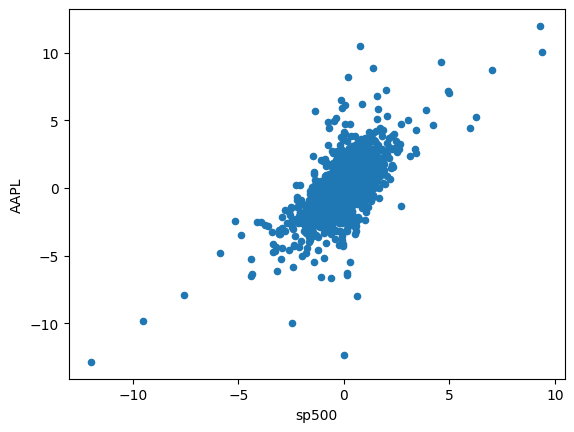

In [13]:
# Select any stock, let's say Apple
stocks_daily_return['AAPL']

# Select the S&P500 (Market)
stocks_daily_return['sp500']

# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [15]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return).
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500)
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market.
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market.
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


#  Import NumPy if not already imported
import numpy as np

# Calculate beta and alpha between AAPL and S&P 500
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for AAPL stock is {:.4f} and alpha is {:.4f}'.format(beta, alpha))

Beta for AAPL stock is 1.1129 and alpha is 0.0528


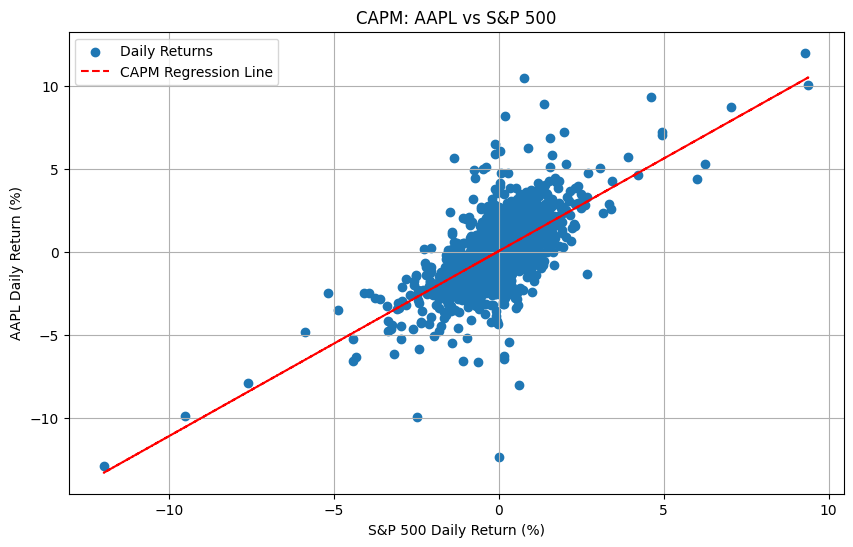

In [17]:
#  Import matplotlib
import matplotlib.pyplot as plt

#  Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], label='Daily Returns')

# Plot the CAPM regression line
# y = beta * x + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, color='r', linestyle='--', label='CAPM Regression Line')

#  Add labels and legend
plt.xlabel('S&P 500 Daily Return (%)')
plt.ylabel('AAPL Daily Return (%)')
plt.title('CAPM: AAPL vs S&P 500')
plt.legend()
plt.grid(True)
plt.show()


This chart is a CAPM (Capital Asset Pricing Model) visualization that helps you understand the relationship between Apple's stock (AAPL) and the overall market (S&P 500) using historical daily returns. Here's how to interpret it:

The x-axis shows the daily return (%) of the S&P 500 index.

The y-axis shows the daily return (%) of AAPL.

This scatter plot captures how AAPL reacted to the market on that day.
When the S&P 500 moves by 1%, AAPL tends to move by 1.11% in the same direction.

The chart shows: Alpha is 0.0528

This suggests:

On average, AAPL outperformed what CAPM predicts by about 0.05% per day, even after accounting for market risk.

This is a sign of positive excess return.


CAPM for AMZN:
Beta = 0.9917
Alpha = 0.1022


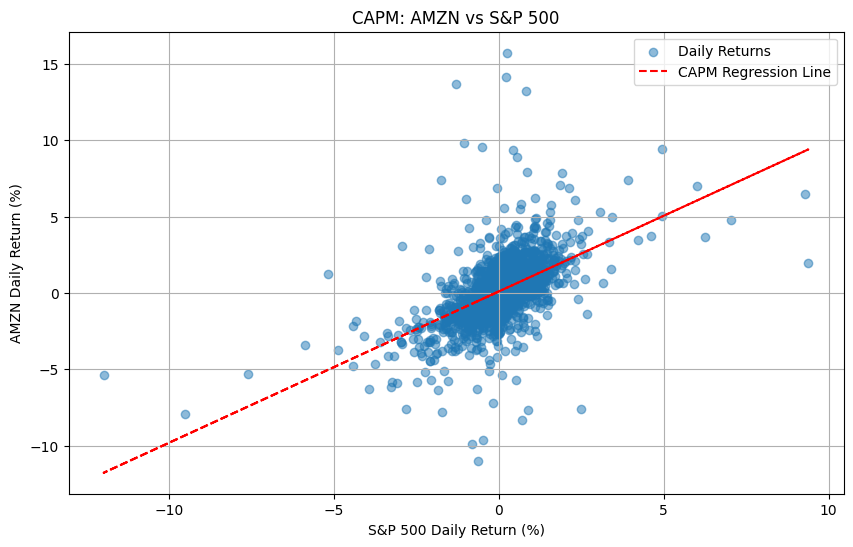

In [18]:
#  Import numpy and matplotlib if not already done (I'll do it again just to be safe)
import numpy as np
import matplotlib.pyplot as plt

#  Select the stock and market column
stock = 'AMZN'
market = 'sp500'

#  Calculate beta and alpha using linear regression (CAPM line)
beta, alpha = np.polyfit(stocks_daily_return[market], stocks_daily_return[stock], 1)
print(f"CAPM for {stock}:\nBeta = {beta:.4f}\nAlpha = {alpha:.4f}")

#  Plot the scatter and CAPM regression line
plt.figure(figsize=(10,6))
plt.scatter(stocks_daily_return[market], stocks_daily_return[stock], label='Daily Returns', alpha=0.5)

# Plot the regression line
plt.plot(stocks_daily_return[market],
         beta * stocks_daily_return[market] + alpha,
         color='r', linestyle='--', label='CAPM Regression Line')

# Labels and title
plt.xlabel('S&P 500 Daily Return (%)')
plt.ylabel(f'{stock} Daily Return (%)')
plt.title(f'CAPM: {stock} vs S&P 500')
plt.legend()
plt.grid(True)
plt.show()


Beta ≈ 0.99:

AMZN has nearly 1:1 sensitivity to market moves.

If the S&P 500 goes up 1%, AMZN tends to move ~0.99%.

It behaves very similarly to the broader market, i.e., “market-neutral” risk.

Alpha ≈ 0.10:

This is the excess return (intercept) when the market return is 0.

A positive alpha (0.10%) implies AMZN outperforms the market slightly, on average, independent of market movements.

Strong Linear Relationship: The points mostly follow a linear pattern, supporting the CAPM assumptions.

Consistent with CAPM Theory: You can use this model to predict AMZN’s return based on the market’s return using the fitted regression.




In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define your list of stock tickers (columns in your dataframe)
stock_list = ['AAPL', 'AMZN', 'BA', 'GOOG', 'IBM', 'MGM', 'T', 'TSLA']

# Dictionaries to store results
beta_dict = {}
alpha_dict = {}

# Loop through each stock and calculate beta/alpha vs S&P500
for stock in stock_list:
    x = stocks_daily_return['sp500']
    y = stocks_daily_return[stock]
    beta, alpha = np.polyfit(x, y, 1)
    beta_dict[stock] = beta
    alpha_dict[stock] = alpha

# Print results
print("CAPM Beta Values:")
for stock, val in beta_dict.items():
    print(f"{stock}: {val:.4f}")

print("\nCAPM Alpha Values:")
for stock, val in alpha_dict.items():
    print(f"{stock}: {val:.4f}")


CAPM Beta Values:
AAPL: 1.1129
AMZN: 0.9917
BA: 1.3829
GOOG: 1.0349
IBM: 0.9604
MGM: 1.6536
T: 0.7446
TSLA: 1.2686

CAPM Alpha Values:
AAPL: 0.0528
AMZN: 0.1022
BA: -0.0023
GOOG: 0.0334
IBM: -0.0535
MGM: -0.0169
T: -0.0286
TSLA: 0.1758


🏆 Best According to CAPM
TSLA has the highest alpha (+0.18) → it outperformed expectations the most given its risk.

AMZN has moderate risk and strong alpha (+0.10) → efficient risk-return balance.

AAPL is also solid — moderate volatility and a small positive alpha.


🚫 Possibly Avoid:
MGM and BA: High beta with low or negative alpha (taking more risk without more return).

IBM and T: Low beta but negative alpha — underperformance even at low risk.

In [20]:
# Define CAPM parameters
risk_free_rate = 0.02  # 2%
market_return = 0.10   # 10%

# Define betas and weights for each stock in the portfolio
betas = {
    'AAPL': 1.1128924148678099,
    'AMZN': 0.9917345712576846,
    'BA': 1.3828672010892775,
    'GOOG': 1.034881768742856,
    'IBM': 0.9604149148095245,
    'MGM': 1.653567706518011,
    'T': 0.7446293454747844,
    'TSLA': 1.2686150101095908
}

# Optional: define weights (must sum to 1). Use equal weighting for now
weights = {
    stock: 1/len(betas) for stock in betas
}

# Calculate expected return for each stock using CAPM
expected_returns = {}
for stock, beta in betas.items():
    r_i = risk_free_rate + beta * (market_return - risk_free_rate)
    expected_returns[stock] = r_i

# Calculate portfolio expected return (weighted sum)
portfolio_expected_return = sum(expected_returns[stock] * weights[stock] for stock in expected_returns)

# Print results
print("CAPM Expected Return for each stock:")
for stock in expected_returns:
    print(f"{stock}: {expected_returns[stock]:.2%}")

print(f"\n📈 Expected Portfolio Return (CAPM-based): {portfolio_expected_return:.2%}")


CAPM Expected Return for each stock:
AAPL: 10.90%
AMZN: 9.93%
BA: 13.06%
GOOG: 10.28%
IBM: 9.68%
MGM: 15.23%
T: 7.96%
TSLA: 12.15%

📈 Expected Portfolio Return (CAPM-based): 11.15%
